# Introduction to `SpatialData` objects

Here is instead the slides for the introductory presentation [are available here](https://docs.google.com/presentation/d/1-qf25cEX6CUi5cyi6UpVfGzt8sri_D_CSJtDCcaUCw0/edit?usp=sharing).

⚠️ Adjust the variable below to the data path on your specific workstation.

In [61]:
data_path = "../data/"

## Reading common raw data formats

The `spatialdata-io` library allows for reading common raw data formats. 
Here we show an example where 3 very different technologies from 10x Genomics are read into a general data structure, given by the [`SpatialData` class](https://spatialdata.scverse.org/en/latest/generated/spatialdata.SpatialData.html#spatialdata.SpatialData). From the presentation you might remember that these are the elements that can be contained inside of a `SpatialData` object:

<img src="../img/nb1_sdata_components.png" width="800">

A `SpatialData` objects can contain:
- 2D/3D multi-channel single-scale/multi-scale *images* (e.g. large H&E images)
- 2D/3D *labels* (e.g. segmentation masks)
- 2D/3D *points* (e.g. transcripts locations with gene id information)
- 2D *shapes* (e.g. cell/nucleus boundaries, anatomical annotatoins)
- *tables* (sparse/dense matrices/dataframes annotating the data).

We will see more of this later.

### Visium 

In [62]:
from spatialdata_io import visium, visium_hd, xenium

In [63]:
sdata_visium = visium(data_path + "visium_2.1.0_2_io_subset")

INFO     reading                                                                                                   
         ../data/visium_2.1.0_2_io_subset/CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_filtered_feature_bc_
         matrix.h5                                                                                                 


/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/spatialdata/models/models.py:996: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


The warning above warning tells us, that whoever made this data available didn't ensure that the variable names (here: genes) are unique. This is essential for several anaylsis steps so we'll use the `AnnData` API to make sure of that. Let's first have a look at the `SpatialData` object we just created:

In [64]:
sdata_visium

SpatialData object
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image': DataArray[cyx] (3, 2000, 1744)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image': DataArray[cyx] (3, 600, 523)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Glioblastoma': GeoDataFrame shape: (5756, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (5756, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Glioblastoma (Shapes)

We see that the contained table is (very creatively) called "table". We can now use this information to make the variable names unique.

In [65]:
sdata_visium.tables["table"].var_names_make_unique()  # modifies in-place

### Visium HD

In [66]:
sdata_visium_hd = visium_hd(data_path + "visium_hd_3.0.0_io_subset")

sdata_visium_hd

/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


SpatialData object
├── Images
│     ├── 'Visium_HD_Mouse_Small_Intestine_hires_image': DataArray[cyx] (3, 5575, 6000)
│     └── 'Visium_HD_Mouse_Small_Intestine_lowres_image': DataArray[cyx] (3, 558, 600)
├── Shapes
│     └── 'Visium_HD_Mouse_Small_Intestine_square_008um': GeoDataFrame shape: (351817, 1) (2D shapes)
└── Tables
      └── 'square_008um': AnnData (351817, 19059)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        Visium_HD_Mouse_Small_Intestine_hires_image (Images), Visium_HD_Mouse_Small_Intestine_square_008um (Shapes)
    ▸ 'downscaled_lowres', with elements:
        Visium_HD_Mouse_Small_Intestine_lowres_image (Images), Visium_HD_Mouse_Small_Intestine_square_008um (Shapes)
    ▸ 'global', with elements:
        Visium_HD_Mouse_Small_Intestine_square_008um (Shapes)

In [67]:
sdata_visium_hd.tables["square_008um"].var_names_make_unique()  # modifies in-place

### Xenium

In [68]:
sdata_xenium = xenium(data_path + "xenium_2.0.0_io_subset")

sdata_xenium

INFO     reading ../data/xenium_2.0.0_io_subset/cell_feature_matrix.h5                                             


/var/folders/vk/6r7qz1g151xgg2tc9r84ym1m0000gp/T/ipykernel_5174/3447752087.py:1: DeprecationWarning: The default value of `cells_as_circles` will change to `False` in the next release. Please pass `True` explicitly to maintain the current behavior.
  sdata_xenium = xenium(data_path + "xenium_2.0.0_io_subset")
/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/functools.py:946: UserWarning: The index of the dataframe is not monotonic increasing. It is recommended to sort the data to adjust the order of the index before calling .parse() to avoid possible problems due to unknown divisions
  return method.__get__(obj, cls)(*args, **kwargs)
ERROR:tifffile:<TiffTag.fromfile> raised TiffFileError('<tifffile.TiffTag 270 @124> invalid value offset 414390846')


SpatialData object
├── Images
│     ├── 'he_image': DataTree[cyx] (3, 5636, 1448), (3, 2818, 724), (3, 1409, 362), (3, 704, 181), (3, 352, 90)
│     └── 'morphology_focus': DataTree[cyx] (1, 17098, 51187), (1, 8549, 25593), (1, 4274, 12796), (1, 2137, 6398), (1, 1068, 3199)
├── Labels
│     ├── 'cell_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
│     └── 'nucleus_labels': DataTree[yx] (17098, 51187), (8549, 25593), (4274, 12796), (2137, 6398), (1068, 3199)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 11) (3D points)
├── Shapes
│     ├── 'cell_boundaries': GeoDataFrame shape: (162254, 1) (2D shapes)
│     ├── 'cell_circles': GeoDataFrame shape: (162254, 2) (2D shapes)
│     └── 'nucleus_boundaries': GeoDataFrame shape: (156628, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (162254, 377)
with coordinate systems:
    ▸ 'global', with elements:
        he_image (Images), morphology_focus (Images), cell_labels

## Saving to the SpatialData Zarr format

We introduce a storage format that extends the [NGFF (Next Generation File Format) specification](https://www.nature.com/articles/s41592-021-01326-w). The NGFF specification is implemented in the [OME-Zarr](https://link.springer.com/article/10.1007/s00418-023-02209-1) disk format; the SpatialData Zarr format is an extension of OME-Zarr and will eventually converge to it.

Practically you can write and read the data as follows.

In [69]:
sdata_visium.write(data_path + "visium.zarr", overwrite=True)

INFO     The Zarr backing store has been changed from None the new file path: ../data/visium.zarr                  


In [70]:
sdata_visium_hd.write(data_path + "visium_hd.zarr", overwrite=True)

INFO     The Zarr backing store has been changed from None the new file path: ../data/visium_hd.zarr               


In [71]:
sdata_xenium.write(data_path + "xenium.zarr", overwrite=True)

INFO     The Zarr backing store has been changed from None the new file path: ../data/xenium.zarr                  


## Loading `SpatialData` from a disk-backed .zarr

<div style="border: 1px solid #4CAF50; border-left-width: 15px; padding: 10px; background-color: #F0FFF0; color: black;">
    <strong>Tip:</strong>
    <p>Given a SpatialData .zarr file, you can print its text representation from a terminal with:<br><code>python -m spatialdata peek data.zarr</code>.</p>
</div>


Before this, the `SpatialData` objects just existed within the memory of the current session. With writing, we've created a proper .zarr file which allows us several benefits, for example loading only certain aspects of the file into memory. Especially when dealing with large files, this can greatly improve the workflow.

Saving to .zarr and re-reading the data is generally recommended when the data is large, since our storage format is optimized for dealing with large collections of images, geometries and annotations.

In [72]:
# spatialdata-io is not needed in case your data is already in the SpatialData Zarr format

import spatialdata as sd

sdata_visium_backed = sd.read_zarr(data_path + "visium.zarr")
sdata_visium_hd_backed = sd.read_zarr(data_path + "visium_hd.zarr")
sdata_xenium_backed = sd.read_zarr(data_path + "xenium.zarr")

/Users/ttreis/miniforge3/envs/spatialdata-workshop/lib/python3.11/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


## Exploring the core slots of a `SpatialData` object

The `spatialdata` library does not introduce specific types for storing the elements, and rather adopts standard classes from the imaging and geospatial Python community. 

In particular:
- single-scale images are represented as [`xarray.DataArray`](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.html) objects.
- multi-scale images are represented as [`data_tree.DataTree`](https://xarray-datatree.readthedocs.io/en/latest/quick-overview.html#datatrees) objects.
- shapes are represented as [`geopandas.GeoDataFrame`](https://geopandas.org/en/stable/docs/user_guide/data_structures.html) objects.
- points are represented as a lazy version of a [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) object; i.e. as [`dask.DataFrame`](https://docs.dask.org/en/stable/dataframe.html) objects.
- tables are represented as [`anndata.AnnData`](https://anndata.readthedocs.io/en/latest/) objects.

We will give a quick overview of these classes here below; please refer to the respective documentation for a deeper introduction.

### Image elements

As previously mentioned, a `SpatialData` object is a container for images, labels, shapes, points and tables. Each of this object is denoted with the term `element`. We will use this term often.

To access an element:

In [73]:
sdata_visium.images["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image"]

<xarray.DataArray 'image' (c: 3, y: 2000, x: 1744)>
dask.array<transpose, shape=(3, 2000, 1744), dtype=uint8, chunksize=(3, 2000, 1744), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 0 1 2
  * y        (y) float64 0.5 1.5 2.5 3.5 ... 1.996e+03 1.998e+03 1.998e+03 2e+03
  * x        (x) float64 0.5 1.5 2.5 3.5 ... 1.742e+03 1.742e+03 1.744e+03
Attributes:
    transform:  {'downscaled_hires': Identity }

In [74]:
sdata_visium.images[
    "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image"
].data

dask.array<transpose, shape=(3, 2000, 1744), dtype=uint8, chunksize=(3, 2000, 1744), chunktype=numpy.ndarray>

In [75]:
sdata_visium.images[
    "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image"
].data.compute()

array([[[ 2,  3,  3, ...,  0,  0,  0],
        [ 2,  2,  3, ...,  0,  0,  0],
        [ 1,  2,  2, ...,  0,  0,  0],
        ...,
        [ 1,  1,  1, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  0,  0,  0],
        [ 1,  1,  1, ...,  0,  0,  0]],

       [[ 5, 10,  4, ...,  0,  0,  0],
        [ 2,  5,  4, ...,  0,  0,  0],
        [ 1,  2,  6, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]],

       [[ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        ...,
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 0,  0,  0, ...,  0,  0,  0]]], dtype=uint8)

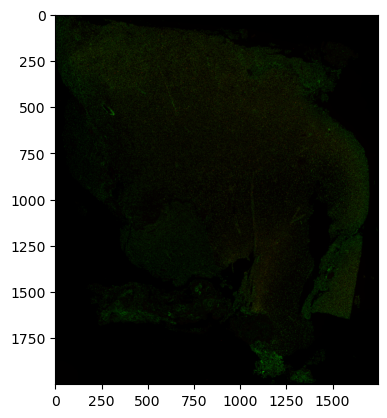

In [76]:
import matplotlib.pyplot as plt

plt.imshow(
    sdata_visium.images[
        "CytAssist_FFPE_Protein_Expression_Human_Glioblastoma_hires_image"
    ]
    .data.transpose(1, 2, 0)  # for matplotlib
    .compute()
)

### `Shapes` elements

In [77]:
sdata_visium.shapes["CytAssist_FFPE_Protein_Expression_Human_Glioblastoma"]

,geometry,radius
spot_id,,
0,POINT (23137 10049),92.296927
1,POINT (4001 22158),92.296927
2,POINT (21933 3952),92.296927
3,POINT (6675 10125),92.296927
4,POINT (880 5188),92.296927
...,...,...
5751,POINT (15985 6471),92.296927
5752,POINT (11283 2310),92.296927
5753,POINT (8432 5829),92.296927


### `Labels` elements

In [78]:
sdata_xenium.labels["nucleus_labels"]

DataTree('None', parent=None)
├── DataTree('scale0')
│       Dimensions:  (y: 17098, x: 51187)
│       Coordinates:
│         * y        (y) float64 0.5 1.5 2.5 3.5 ... 1.71e+04 1.71e+04 1.71e+04
│         * x        (x) float64 0.5 1.5 2.5 3.5 ... 5.118e+04 5.119e+04 5.119e+04
│       Data variables:
│           image    (y, x) uint32 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── DataTree('scale1')
│       Dimensions:  (y: 8549, x: 25593)
│       Coordinates:
│         * y        (y) float64 1.0 3.0 5.0 7.0 ... 1.709e+04 1.71e+04 1.71e+04
│         * x        (x) float64 1.0 3.0 5.0 7.0 ... 5.118e+04 5.118e+04 5.119e+04
│       Data variables:
│           image    (y, x) uint32 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── DataTree('scale2')
│       Dimensions:  (y: 4274, x: 12796)
│       Coordinates:
│         * y        (y) float64 2.0 6.001 10.0 14.0 ... 1.709e+04 1.709e+04 1.71e+04
│         * x        (x) float64 2.0 6.0 10.0 14.0 ... 5.118e+04 5.118e+04 5.118e+04
│       Data variables:
│           image    (y, x) uint32 dask.array<chunksize=(4096, 4096), meta=np.ndarray>
├── DataTree('scale3')
│       Dimensions:  (y: 2137, x: 6398)
│       Coordinates:
│         * y        (y) float64 4.0 12.0 20.0 28.0 ... 1.708e+04 1.709e+04 1.709e+04
│         * x        (x) float64 4.0 12.0 20.0 28.0 ... 5.117e+04 5.117e+04 5.118e+04
│       Data variables:
│           image    (y, x) uint32 dask.array<chunksize=(2137, 4096), meta=np.ndarray>
└── DataTree('scale4')
        Dimensions:  (y: 1068, x: 3199)
        Coordinates:
          * y        (y) float64 8.005 24.01 40.02 ... 1.706e+04 1.707e+04 1.709e+04
          * x        (x) float64 8.0 24.0 40.0 56.0 ... 5.115e+04 5.116e+04 5.118e+04
        Data variables:
            image    (y, x) uint32 dask.array<chunksize=(1068, 3199), meta=np.ndarray>

In [79]:
sdata_xenium.labels["nucleus_labels"]["scale4"]

DataTree('scale4', parent="None")
    Dimensions:  (y: 1068, x: 3199)
    Coordinates:
      * y        (y) float64 8.005 24.01 40.02 ... 1.706e+04 1.707e+04 1.709e+04
      * x        (x) float64 8.0 24.0 40.0 56.0 ... 5.115e+04 5.116e+04 5.118e+04
    Data variables:
        image    (y, x) uint32 dask.array<chunksize=(1068, 3199), meta=np.ndarray>

In [80]:
sdata_xenium.labels["nucleus_labels"]["scale4"].image

<xarray.DataArray 'image' (y: 1068, x: 3199)>
dask.array<rechunk-merge, shape=(1068, 3199), dtype=uint32, chunksize=(1068, 3199), chunktype=numpy.ndarray>
Coordinates:
  * y        (y) float64 8.005 24.01 40.02 ... 1.706e+04 1.707e+04 1.709e+04
  * x        (x) float64 8.0 24.0 40.0 56.0 ... 5.115e+04 5.116e+04 5.118e+04
Attributes:
    transform:  {'global': Sequence \n    Scale (y, x)\n        [16.0093633  ...

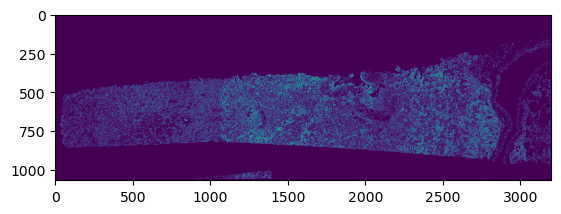

In [81]:
plt.imshow(sdata_xenium.labels["nucleus_labels"]["scale4"].image.data.compute())

In [82]:
sdata_xenium.labels["nucleus_labels"]["scale4"].image.data.compute()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)

![image.png](../img/nb1_segmentation_example.png)

### `Points` elements

In [83]:
sdata_xenium.points["transcripts"]

,x,y,z,feature_name,cell_id,transcript_id,nucleus_distance,qv,codeword_index,overlaps_nucleus,fov_name
npartitions=4,,,,,,,,,,,
,float32,float32,float32,category[known],string,uint64,float32,float32,int32,uint8,string
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...
,...,...,...,...,...,...,...,...,...,...,...


In [84]:
sdata_xenium.points["transcripts"].head(5)

,x,y,z,feature_name,cell_id,transcript_id,nucleus_distance,qv,codeword_index,overlaps_nucleus,fov_name
0,66.847679,1439.419434,16.830444,STEAP4,UNASSIGNED,281582350893841,346.201141,21.359655,170,0,C2
1,202.231186,1421.553955,16.527092,THBS2,UNASSIGNED,281582350895222,327.802612,40.000000,46,0,C2
2,60.755959,1427.187744,16.859751,CXCR4,UNASSIGNED,281582350896236,359.865814,38.001629,379,0,C2
3,116.347923,1415.833618,16.661528,CXCR4,UNASSIGNED,281582350896244,349.481201,40.000000,379,0,C2
4,195.983978,1445.074829,16.494038,EGFL7,UNASSIGNED,281582350896355,304.836700,40.000000,223,0,C2


In [85]:
# takes a bit because we have 12 million rows
sdata_xenium.points["transcripts"].compute().shape

(12165021, 11)

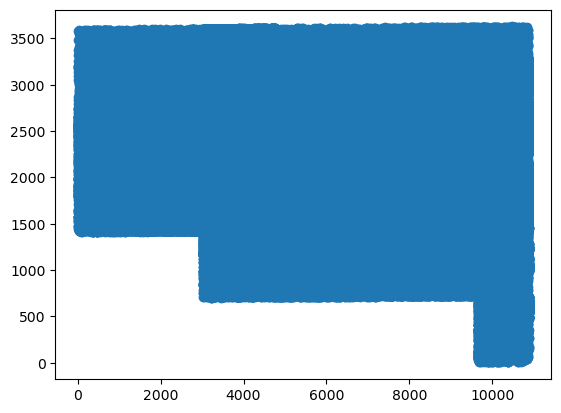

In [86]:
plt.scatter(
    x=sdata_xenium.points["transcripts"]["x"].compute(),
    y=sdata_xenium.points["transcripts"]["y"].compute(),
)

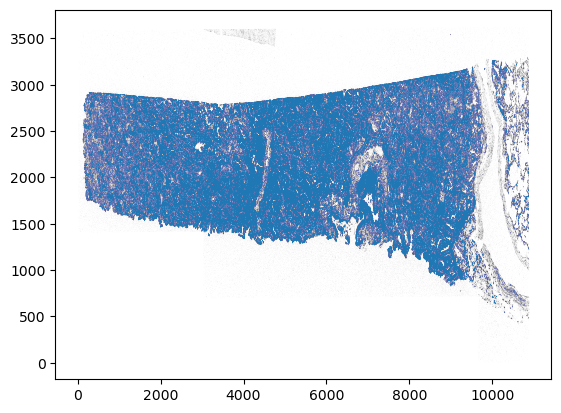

In [87]:
plt.scatter(
    x=sdata_xenium.points["transcripts"]["x"].compute(),
    y=sdata_xenium.points["transcripts"]["y"].compute(),
    alpha=0.002,
    marker=".",
    s=1,
)

### `Tables` elements
<img src="../img/nb1_anndata.png" width="600">

In [88]:
sdata_visium.tables["table"]

AnnData object with n_obs × n_vars = 5756 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

In [89]:
sdata_visium.tables["table"].to_df()

,SAMD11,NOC2L,KLHL17,PLEKHN1,PERM1,HES4,ISG15,AGRN,RNF223,C1orf159,...,MT-ND2,MT-CO2,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB
AACAATGGAACCACAT-1,0.0,1.0,0.0,0.0,0.0,0.0,2.0,4.0,0.0,0.0,...,73.0,138.0,320.0,308.0,266.0,63.0,429.0,38.0,14.0,233.0
AACAATGTGCTCCGAG-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,31.0,43.0,52.0,106.0,29.0,34.0,64.0,12.0,12.0,41.0
AACACCAGCCTACTCG-1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,15.0,16.0,18.0,28.0,16.0,8.0,14.0,5.0,8.0,13.0
AACACCATTCGCATAC-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,54.0,104.0,283.0,340.0,147.0,45.0,323.0,17.0,9.0,168.0
AACACCGAATGTCTCA-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,153.0,250.0,342.0,632.0,236.0,183.0,395.0,71.0,14.0,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TGTTGGCCTGTAGCGG-1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,...,29.0,39.0,181.0,173.0,163.0,14.0,323.0,19.0,6.0,123.0
TGTTGGTGCGCACGAG-1,0.0,1.0,0.0,0.0,0.0,1.0,42.0,2.0,0.0,1.0,...,76.0,103.0,259.0,298.0,181.0,60.0,344.0,22.0,5.0,181.0
TGTTGGTGCGCTTCGC-1,0.0,1.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,1.0,...,53.0,97.0,367.0,281.0,249.0,36.0,392.0,32.0,12.0,233.0
TGTTGGTGCGGAATCA-1,0.0,0.0,0.0,0.0,0.0,2.0,3.0,4.0,0.0,0.0,...,12.0,39.0,172.0,102.0,148.0,8.0,246.0,8.0,8.0,63.0


In [90]:
sdata_visium.tables["table"].obs

,in_tissue,array_row,array_col,spot_id,region
AACAATGGAACCACAT-1,1,54,32,0,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
AACAATGTGCTCCGAG-1,1,98,158,1,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
AACACCAGCCTACTCG-1,1,31,39,2,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
AACACCATTCGCATAC-1,1,53,139,3,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
AACACCGAATGTCTCA-1,1,34,176,4,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
...,...,...,...,...,...
TGTTGGCCTGTAGCGG-1,1,40,78,5751,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
TGTTGGTGCGCACGAG-1,1,24,108,5752,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
TGTTGGTGCGCTTCGC-1,1,37,127,5753,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
TGTTGGTGCGGAATCA-1,1,83,87,5754,CytAssist_FFPE_Protein_Expression_Human_Gliobl...
